In [2]:
from binance.client import Client
api_key=''
api_secret=''

client = Client(api_key=api_key,api_secret=api_secret)

In [ ]:
client.KLIN

In [10]:
tickers = client.get_all_tickers()

In [7]:
[ t["symbol"] for t in tickers if "USD" in t["symbol"][3:]]

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'BTCTUSD',
 'ETHTUSD',
 'EOSUSDT',
 'TUSDUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'ONTUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'ICXUSDT',
 'VENUSDT',
 'NULSUSDT',
 'VETUSDT',
 'PAXUSDT',
 'BCHABCUSDT',
 'BCHSVUSDT',
 'BNBTUSD',
 'XRPTUSD',
 'EOSTUSD',
 'XLMTUSD',
 'BNBUSDC',
 'BTCUSDC',
 'ETHUSDC',
 'XRPUSDC',
 'EOSUSDC',
 'XLMUSDC',
 'USDCUSDT',
 'ADATUSD',
 'TRXTUSD',
 'NEOTUSD',
 'PAXTUSD',
 'USDCTUSD',
 'LINKUSDT',
 'LINKTUSD',
 'LINKUSDC',
 'WAVESUSDT',
 'WAVESTUSD',
 'WAVESUSDC',
 'BCHABCTUSD',
 'BCHABCUSDC',
 'BCHSVTUSD',
 'BCHSVUSDC',
 'LTCTUSD',
 'LTCUSDC',
 'TRXUSDC',
 'BTTUSDT',
 'BNBUSDS',
 'BTCUSDS',
 'USDSUSDT',
 'USDSTUSD',
 'USDSUSDC',
 'BTTTUSD',
 'BTTUSDC',
 'ONGUSDT',
 'HOTUSDT',
 'ZILUSDT',
 'ZRXUSDT',
 'FETUSDT',
 'BATUSDT',
 'XMRUSDT',
 'ZECUSDT',
 'ZECTUSD',
 'ZECUSDC',
 'IOSTUSDT',
 'CELRUSDT',
 'ADAUSDC',
 'NEOUSDC',
 'DASHUSDT',
 'NANOUSDT',
 'OMGUSDT',
 'THETAUSDT',
 

In [18]:
klines = client.get_historical_klines("BTCUSDT",client.KLINE_INTERVAL_1MINUTE, "15 May, 2021")

In [5]:
import os

import pandas as pd
path = "/home/cehmann/workspaces/stonks/data/binance/BTCUSDT-1m-2021-04.csv"
columns = ["open_time","open","high","low","close","vol", "close_time","quote_asset_vol","n_trades","taker_buy_base","taker_buy_quote"]
df = pd.read_csv(path,header=None)
df = df.rename(columns={ i:c for i,c in enumerate(columns)})
keep = ["open_time","open","high","low","close","vol"]
for c in df.columns:
    if c not in keep:
        del df[c]
df["datetime"] = df.apply(lambda row: datetime.fromtimestamp(row["open_time"] / 1000),axis=1  )
df = df.set_index("datetime")
del df["open_time"]
out_path = os.path.dirname(path) + "/" +  os.path.basename(path).replace(".csv","_cleaned.csv")

df.to_csv(out_path)

In [7]:
import datetime
import backtrader as bt

path = "/home/cehmann/workspaces/stonks/data/binance/BTCUSDT-1m-2021-04_cleaned.csv"
data2 = bt.feeds.GenericCSVData(
    dataname=path,
    #fromdate=datetime.datetime(2021, 4, 1,2,0),
    #todate=datetime.datetime(2020, 4, 2,2,0),
    nullvalue=0.0,
    #dtformat=('%Y-%m-%d'),
    datetime=0,
    time=-1,
    high=2,
    low=3,
    open=1,
    close=4,
    volume=5,
    openinterest=-1)

data0 = bt.feeds.YahooFinanceData(dataname='MSFT', fromdate=datetime.datetime(2011, 1, 1),
                                todate=datetime.datetime(2012, 12, 31))



<IPython.core.display.Javascript object>


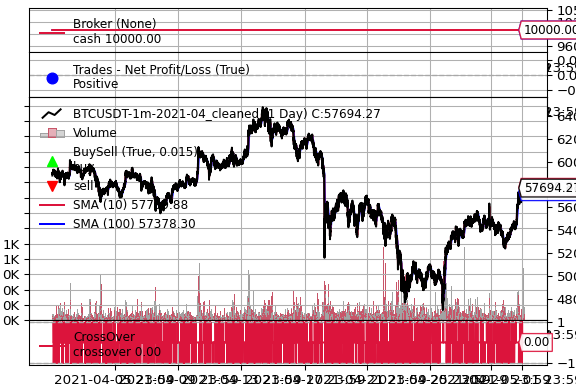

[[<Figure size 432x288 with 5 Axes>]]

In [8]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('tkAgg')
%matplotlib inline
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=100)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
cerebro.adddata(data2)
stats = cerebro.run()
print(stats)
cerebro.plot()

<IPython.core.display.Javascript object>


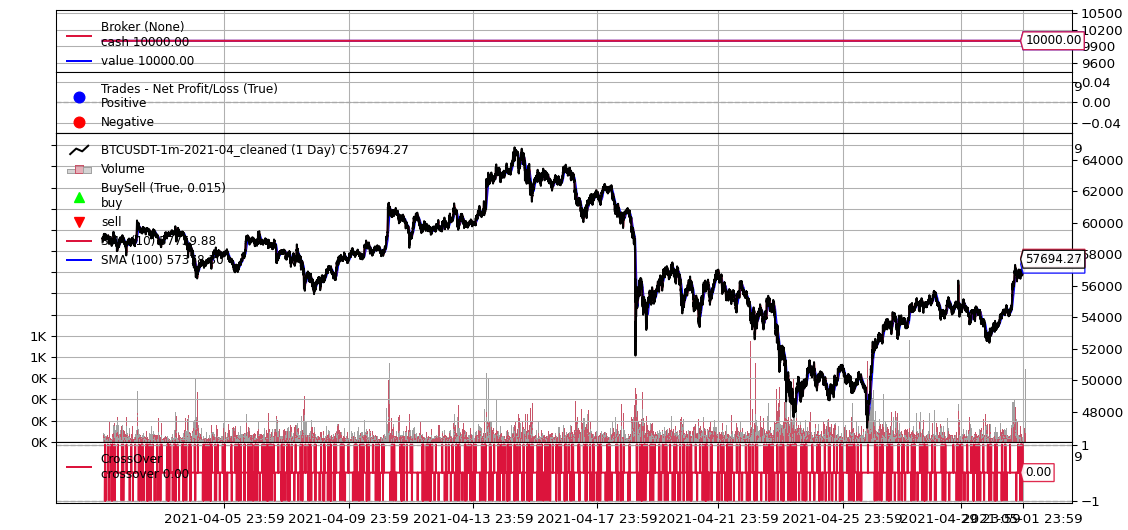

[[<Figure size 432x288 with 5 Axes>]]

In [58]:
%matplotlib inline

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)
cerebro.adddata(data0)
stats = cerebro.run()
print(stats)
cerebro.plot()

,open_time,open,high,low,close,vol,close_time,quote_asset_vol,n_trades,taker_buy_base,taker_buy_quote,11
0,1617235200000,58739.46,58796.25,58720.82,58795.74,56.541494,1617235259999,3.321829e+06,2241,26.243347,1.541872e+06,0
1,1617235260000,58795.74,58858.21,58787.48,58815.42,45.844834,1617235319999,2.697096e+06,1449,30.030153,1.766725e+06,0
2,1617235320000,58815.42,58963.91,58808.99,58963.41,80.257514,1617235379999,4.727107e+06,2033,47.965095,2.824978e+06,0
3,1617235380000,58953.83,59080.26,58952.34,59063.13,107.880493,1617235439999,6.367395e+06,2894,66.198720,3.906898e+06,0
4,1617235440000,59063.13,59093.00,58937.30,59061.14,68.599352,1617235499999,4.049386e+06,1694,33.519228,1.978962e+06,0
5,1617235500000,59071.84,59083.00,58996.06,59007.73,20.937489,1617235559999,1.236347e+06,938,10.847215,6.403963e+05,0
6,1617235560000,58993.04,59080.00,58985.46,59043.88,29.342092,1617235619999,1.732207e+06,1030,17.242057,1.017912e+06,0
7,1617235620000,59043.88,59088.95,59007.00,59007.79,26.401287,1617235679999,1.558836e+06,1180,18.299555,1.080562e+06,0
8,1617235680000,59007.79,59071.02,58997.24,59047.38,44.141760,1617235739999,2.605330e+06,1326,22.765581,1.343569e+06,0
9,1617235740000,59047.38,59070.88,59030.00,59030.01,29.801803,1617235799999,1.759833e+06,1087,5.077067,2.998040e+05,0
